# 1. Importing Libraries

In [950]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_rows", None, "display.max_columns", None)

# 2. Importing datasets

In [1003]:

train = pd.read_csv("SPARCS_194_2016_SelectedHospitals.csv", parse_dates=['Discharge Year'])


## User Defined Functions

In [1004]:
def quality_report(df):
    """
    Description: Displays quality of data in terms of missing values, 
    unique numbers, datatypes etc.
    
    Arguments: Dataframe
    """
    dtypes = df.dtypes
    nuniq = df.T.apply(lambda x: x.nunique(), axis=1)
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    quality_df  = pd.concat([total, percent, nuniq, dtypes], axis=1, keys=['Total NaN', 'Percent of NaN','Nunique', 'Dtype'])
    display(quality_df)


def object_count_plot(df):
    """Description : Plot countplot for all categorical features present in the dataframe passed Argument : Dataframe"""
    for var in df.columns:
        if df[var].dtype == 'object':
            print(df[var].value_counts())
            plt.figure(figsize=(12,5))
            g = sns.countplot(x=var,data=df)
            g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
            plt.tight_layout()
            plt.show()
            
        
def numeric_distribution_plot(df):
    """Description : Gives distribution plot for all the numeric featuresin the dataframe passedArgument : Dataframe"""
    for col in df.columns:
        if df[col].dtype != 'object':
            print(df[col].describe())
            plt.figure(figsize=(12,5))
            plt.title("Distribution of "+col)
            ax = sns.distplot(df[col].dropna())
            plt.tight_layout()
            plt.show()
            value_counts = df[col].value_counts().rename_axis("unique_"+col).to_frame('counts').sort_values('counts',ascending=False)
            print(value_counts.head(5),'\n',value_counts.tail(5))
                

## Visualising the data set

In [1005]:
train.head(2)

,Facility ID,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,Admit Day of Week,Type of Admission,Patient Disposition,Discharge Year,Discharge Day of Week,CCS Diagnosis Code,CCS Diagnosis Description,CCS Procedure Code,CCS Procedure Description,APR DRG Code,APR DRG Description,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Source of Payment 1,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,66,Olean General Hospital,70 or Older,147,M,White,Not Span/Hispanic,2,None,Emergency,Home or Self Care,2016-01-01,None,108,Congestive heart failure; nonhypertensive,58,HEMODIALYSIS,194,Heart failure,5,Diseases and Disorders of the Circulatory System,3,Major,Major,Medical,Medicare,0,N,Y,9976.57,5585.08
1,66,Olean General Hospital,50 to 69,147,F,White,Not Span/Hispanic,5,None,Emergency,Inpatient Rehabilitation Facility,2016-01-01,None,108,Congestive heart failure; nonhypertensive,0,NO PROC,194,Heart failure,5,Diseases and Disorders of the Circulatory System,3,Major,Major,Medical,Medicaid,0,N,Y,16788.23,8609.63


# 3. Quick EDA

In [1006]:
quality_report(train)
train.shape


,Total NaN,Percent of NaN,Nunique,Dtype
Zip Code - 3 digits,5,0.105285,47,object
Facility ID,0,0.000000,8,int64
CCS Procedure Description,0,0.000000,75,object
Total Charges,0,0.000000,4744,float64
Emergency Department Indicator,0,0.000000,2,object
Abortion Edit Indicator,0,0.000000,1,object
Birth Weight,0,0.000000,2,int64
Source of Payment 1,0,0.000000,9,object
APR Medical Surgical Description,0,0.000000,1,object
APR Risk of Mortality,0,0.000000,4,object


(4749, 31)

In [1007]:
# there are 5 missing values in the zip code field. 
#dropping these 
train.dropna(axis = 0,inplace= True)
train.shape

(4744, 31)

In [1008]:
#dropping redundant columns i.e columns that give little new information 
train.drop(['Facility Name','APR MDC Code',
                      'APR DRG Description','APR DRG Description',
                      'Discharge Day of Week', 'Discharge Year',
                      'Admit Day of Week','APR Medical Surgical Description'
                      ,'Abortion Edit Indicator','Birth Weight'],axis =1, inplace = True)

train.shape

(4744, 22)

In [1009]:
#the attributes reduced to 22 after dropping low information columns

In [1010]:
train.columns 

Index(['Facility ID', 'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race',
       'Ethnicity', 'Length of Stay', 'Type of Admission',
       'Patient Disposition', 'CCS Diagnosis Code',
       'CCS Diagnosis Description', 'CCS Procedure Code',
       'CCS Procedure Description', 'APR DRG Code', 'APR MDC Description',
       'APR Severity of Illness Code', 'APR Severity of Illness Description',
       'APR Risk of Mortality', 'Source of Payment 1',
       'Emergency Department Indicator', 'Total Charges', 'Total Costs'],
      dtype='object')

## Univariate Analysis

### Categorical data

70 or Older    3082
50 to 69       1378
30 to 49        237
0 to 17          28
18 to 29         19
Name: Age Group, dtype: int64


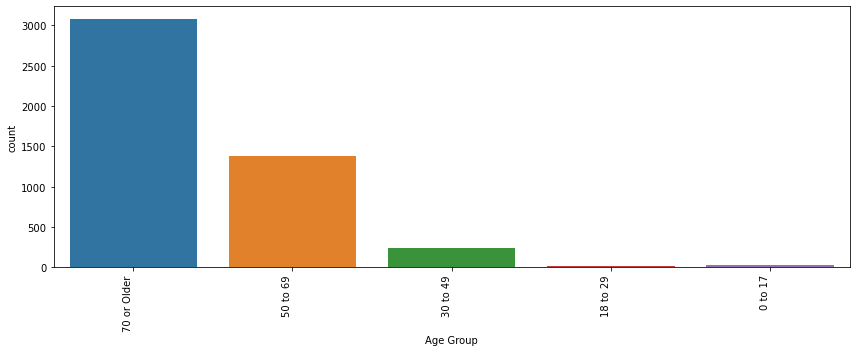

M    2554
F    2190
Name: Gender, dtype: int64


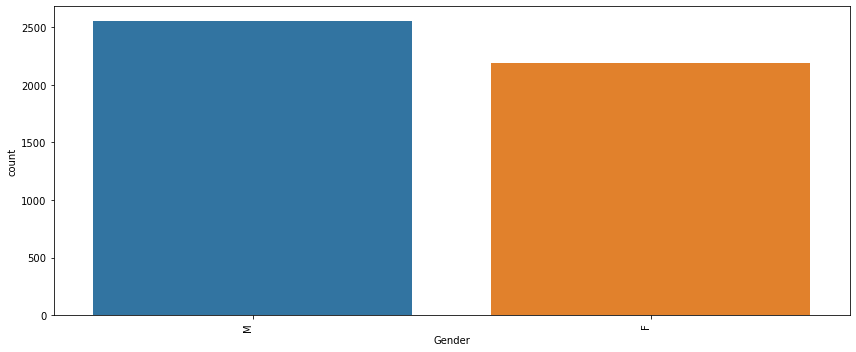

White                     2875
Other Race                 999
Black/African American     778
Multi-racial                92
Name: Race, dtype: int64


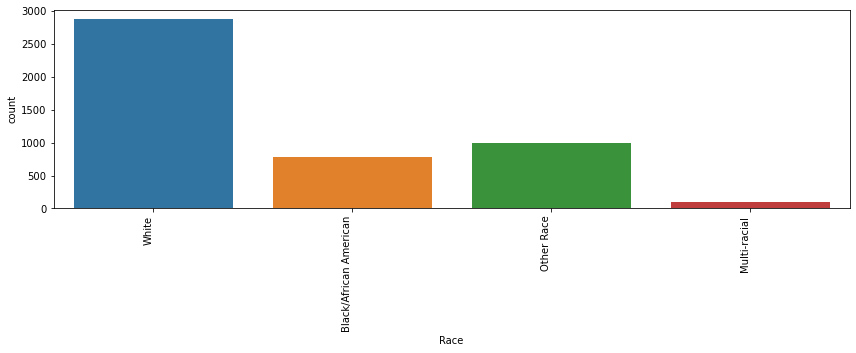

2        655
3        648
4        625
5        527
6        402
7        326
1        296
8        267
9        204
10       148
11       117
12        97
14        88
13        71
15        42
16        38
17        33
19        23
18        23
21        17
20        14
22        11
23        10
25         7
28         6
34         5
30         5
27         3
29         3
26         3
24         3
31         3
35         2
33         2
48         2
32         2
43         2
50         2
52         1
44         1
46         1
41         1
40         1
36         1
45         1
68         1
56         1
120 +      1
42         1
94         1
Name: Length of Stay, dtype: int64


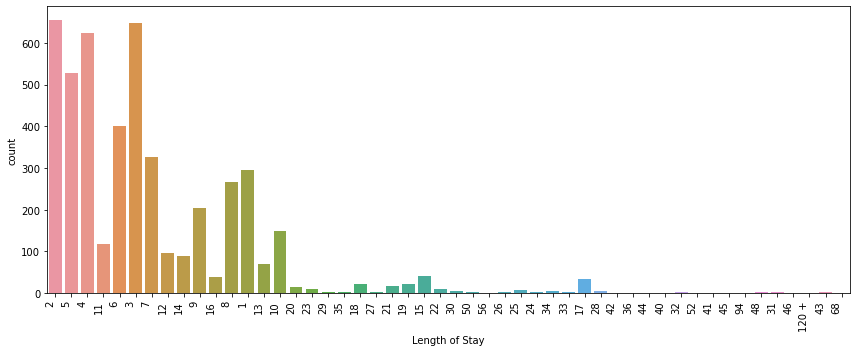

Emergency    4321
Urgent        315
Elective      108
Name: Type of Admission, dtype: int64


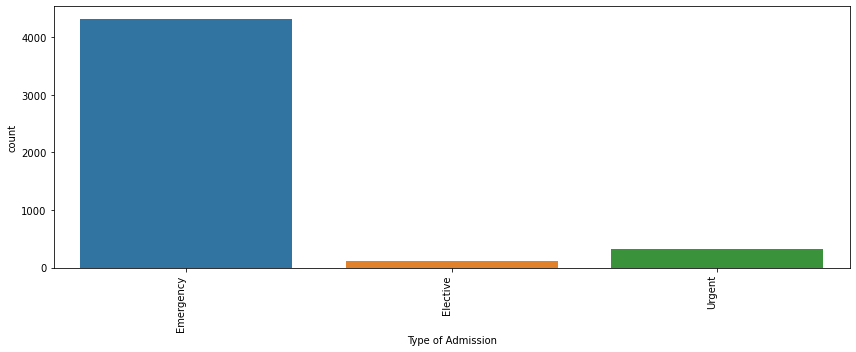

Medicare                     3618
Medicaid                      602
Private Health Insurance      206
Blue Cross/Blue Shield        181
Self-Pay                       72
Federal/State/Local/VA         22
Managed Care, Unspecified      22
Department of Corrections      12
Miscellaneous/Other             9
Name: Source of Payment 1, dtype: int64


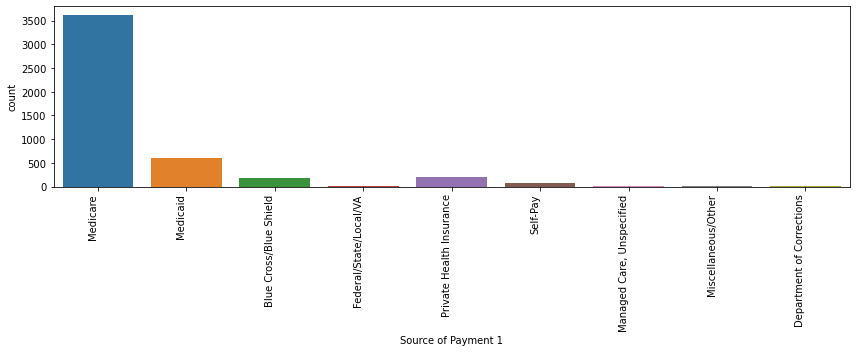

In [1011]:
#using the user defined function to generate plots for the object variables
object_count_plot(train.drop(['Emergency Department Indicator','APR Risk of Mortality','APR Severity of Illness Description','APR MDC Description','Zip Code - 3 digits','Ethnicity','Patient Disposition','CCS Procedure Description','CCS Diagnosis Description'],axis =1))

In [1012]:
#### It can be seen that the most prominent age groups are "70 or older" and "50 to 69"
#### Patients are predominantly white
#### The male gender is more prominent
#### Patients typically don't stay for more than 10 days also there is inconsistency in the data entry "120+"
#### Emergency admissions are the most common
#### Most Patients pay with "Medicare" option


### Numerical data

count    4744.000000
mean      831.144393
std       526.434521
min        66.000000
25%       413.000000
50%       541.000000
75%      1463.000000
max      1464.000000
Name: Facility ID, dtype: float64


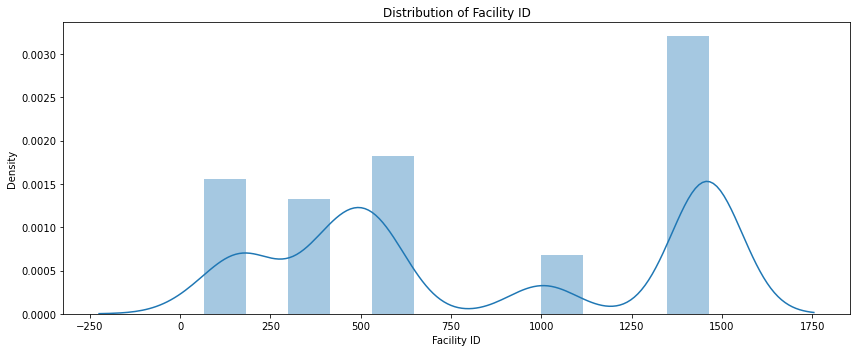

                    counts
unique_Facility ID        
541                   1008
1464                   846
413                    730
181                    677
1463                   583 
                     counts
unique_Facility ID        
181                    677
1463                   583
1005                   375
1438                   343
66                     182
count    4744.000000
mean      106.897976
std         4.762604
min        99.000000
25%       108.000000
50%       108.000000
75%       108.000000
max       133.000000
Name: CCS Diagnosis Code, dtype: float64


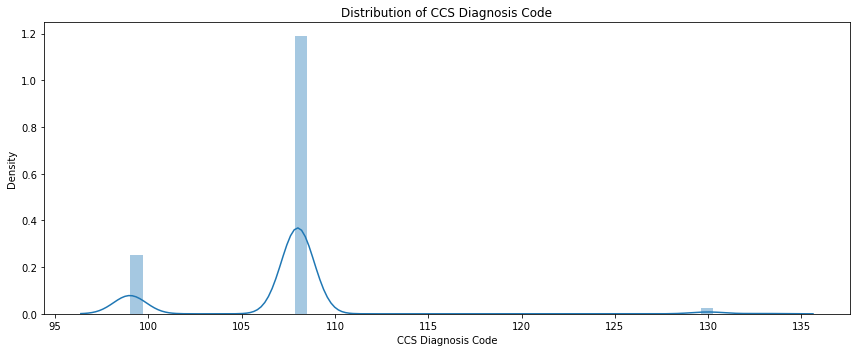

                           counts
unique_CCS Diagnosis Code        
108                          3835
99                            815
130                            81
133                            13 
                            counts
unique_CCS Diagnosis Code        
108                          3835
99                            815
130                            81
133                            13
count    4744.000000
mean       77.533938
std        98.566693
min         0.000000
25%         0.000000
50%         0.000000
75%       203.000000
max       231.000000
Name: CCS Procedure Code, dtype: float64


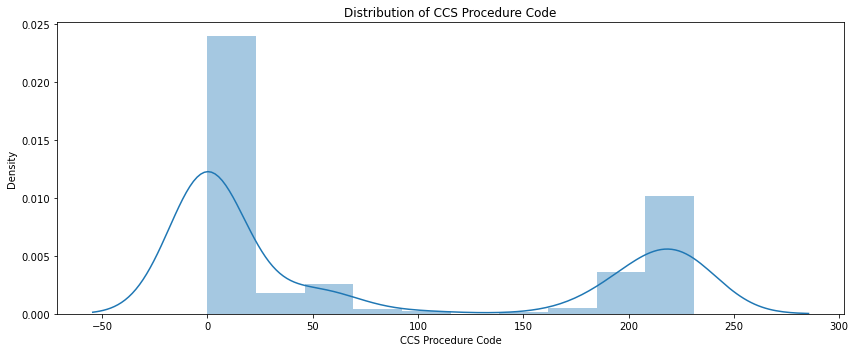

                           counts
unique_CCS Procedure Code        
0                            2621
231                           431
216                           393
193                           210
58                            153 
                            counts
unique_CCS Procedure Code        
191                             1
215                             1
207                             1
211                             1
98                              1
count    4744.000000
mean        2.569983
std         0.814786
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: APR Severity of Illness Code, dtype: float64


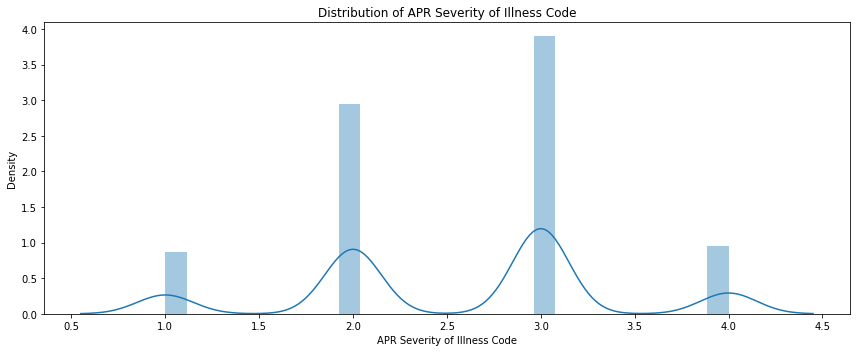

                                     counts
unique_APR Severity of Illness Code        
3                                      2134
2                                      1617
4                                       521
1                                       472 
                                      counts
unique_APR Severity of Illness Code        
3                                      2134
2                                      1617
4                                       521
1                                       472
count    4.744000e+03
mean     5.315018e+04
std      6.307656e+04
min      1.000000e+00
25%      1.999650e+04
50%      3.638725e+04
75%      6.489832e+04
max      1.827588e+06
Name: Total Charges, dtype: float64


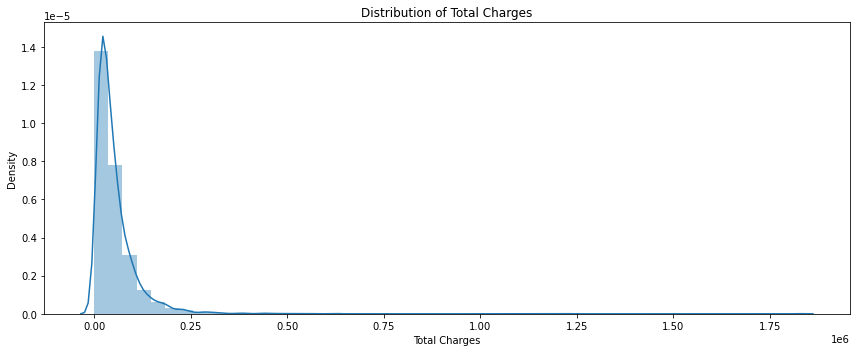

                      counts
unique_Total Charges        
17952.12                   2
77112.12                   2
40288.46                   2
1.00                       2
12872.70                   2 
                       counts
unique_Total Charges        
59570.70                   1
40085.91                   1
46790.04                   1
16325.58                   1
28275.56                   1
count      4744.000000
mean      17527.486142
std       23323.993325
min           0.290000
25%        6670.457500
50%       11329.390000
75%       20195.825000
max      636346.510000
Name: Total Costs, dtype: float64


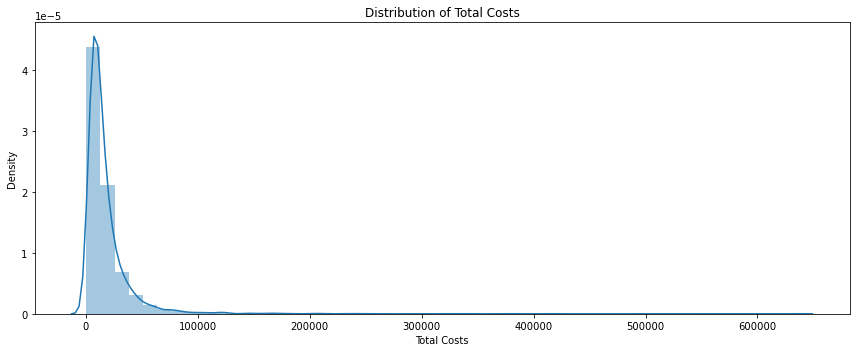

                    counts
unique_Total Costs        
10293.05                 2
6690.73                  2
6935.01                  2
5608.66                  2
0.29                     2 
                     counts
unique_Total Costs        
17414.50                 1
37481.78                 1
3463.59                  1
3800.74                  1
14768.31                 1


In [1013]:
#performing EDA for the numeric data

numeric_distribution_plot(train.drop('APR DRG Code',axis = 1))

In [1014]:
#the density plots and the count tables shown above. 
#Facility with ID 541 i.e North Shore University Hospital has the most patients
#The most common CCS Diagnosis Code is 108 i.e Congestive heart failure; nonhypertensive
#Patients usually have APR Severity of Illness Code of 3
#Patients often have total charges of less than 250,000 and total costs of less than 100,000


## Outlier Detection and Removal

In [1015]:
#checking for outliers in total charges, total cost and length of stay using boxplots
# outliers are: train['Total Charges']>80000,train['Total Costs']>250000,train['Length of Stay']>65 

<AxesSubplot:xlabel='Total Charges'>

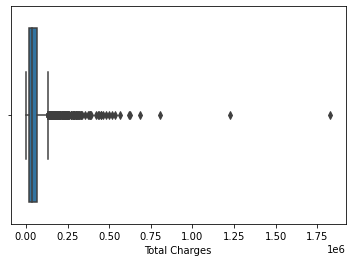

In [1016]:
sns.boxplot(train['Total Charges'])

<AxesSubplot:xlabel='Total Costs'>

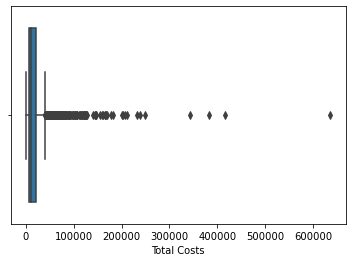

In [1017]:
sns.boxplot(train['Total Costs'])

In [1018]:
#to plot the box plot for length of stay
train['Length of Stay'].describe()

count     4744
unique      50
top          2
freq       655
Name: Length of Stay, dtype: object

In [1019]:
#found an unconventional input in the index 
train[train['Length of Stay']=='120 +' ].index.values

array([3262], dtype=int64)

In [1020]:
#capping this observation at index 3262 to 120
train['Length of Stay'][3262] = 120
train['Length of Stay'] = train['Length of Stay'].apply(lambda x: float(x))

<AxesSubplot:xlabel='Length of Stay'>

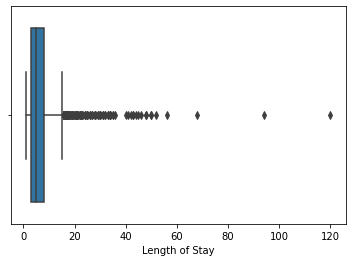

In [1021]:
sns.boxplot(train['Length of Stay'])

In [1022]:
train.shape

(4744, 22)

In [1023]:
train = train.drop(train.loc[train['Total Charges']>1000000].index)
train.shape

(4742, 22)

In [1024]:
train = train.drop(train.loc[train['Total Costs']>275000].index)
train.shape

(4740, 22)

In [1025]:
train = train.drop(train.loc[train['Length of Stay']>65].index)
train.shape

(4738, 22)

In [1026]:
train.describe()

,Facility ID,Length of Stay,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR Severity of Illness Code,Total Charges,Total Costs
count,4738.000000,4738.000000,4738.000000,4738.000000,4738.0,4738.000000,4738.000000,4738.000000
mean,830.354158,6.138244,106.896581,77.426973,194.0,2.568594,52025.613527,17086.367617
std,526.298669,5.137141,4.765458,98.546669,0.0,0.814193,52123.538960,19062.998834
min,66.000000,1.000000,99.000000,0.000000,194.0,1.000000,1.000000,0.290000
25%,413.000000,3.000000,108.000000,0.000000,194.0,2.000000,19987.777500,6667.802500
50%,541.000000,5.000000,108.000000,0.000000,194.0,3.000000,36311.345000,11325.590000
75%,1463.000000,8.000000,108.000000,203.000000,194.0,3.000000,64795.425000,20129.780000
max,1464.000000,56.000000,133.000000,231.000000,194.0,4.000000,623272.480000,237953.710000


# 4. Data Preprocessing

In [1027]:
train.columns

Index(['Facility ID', 'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race',
       'Ethnicity', 'Length of Stay', 'Type of Admission',
       'Patient Disposition', 'CCS Diagnosis Code',
       'CCS Diagnosis Description', 'CCS Procedure Code',
       'CCS Procedure Description', 'APR DRG Code', 'APR MDC Description',
       'APR Severity of Illness Code', 'APR Severity of Illness Description',
       'APR Risk of Mortality', 'Source of Payment 1',
       'Emergency Department Indicator', 'Total Charges', 'Total Costs'],
      dtype='object')

In [1028]:
quality_report(train)

,Total NaN,Percent of NaN,Nunique,Dtype
Facility ID,0,0.0,8,int64
Age Group,0,0.0,5,object
Total Charges,0,0.0,4733,float64
Emergency Department Indicator,0,0.0,2,object
Source of Payment 1,0,0.0,9,object
APR Risk of Mortality,0,0.0,4,object
APR Severity of Illness Description,0,0.0,4,object
APR Severity of Illness Code,0,0.0,4,int64
APR MDC Description,0,0.0,1,object
APR DRG Code,0,0.0,1,int64


In [1029]:
#selecting all categorical columns
fields = []
for col in train.columns:
    if train[col].dtype == 'object':
        fields.append(col)
print(fields)

['Age Group', 'Zip Code - 3 digits', 'Gender', 'Race', 'Ethnicity', 'Type of Admission', 'Patient Disposition', 'CCS Diagnosis Description', 'CCS Procedure Description', 'APR MDC Description', 'APR Severity of Illness Description', 'APR Risk of Mortality', 'Source of Payment 1', 'Emergency Department Indicator']


## Label Encoding

In [1030]:
train['Length_of_Stay'] = train['Length of Stay']
train.drop('Length of Stay',axis = 1,inplace = True)
train['Total_Costs'] = train['Total Costs']
train.drop('Total Costs',axis = 1,inplace = True)



In [1031]:
train['Total_Charges'] = train['Total Charges']
train.drop('Total Charges',axis = 1,inplace = True)

In [1032]:
train['Total_Costs'][17]

7337.06

In [1033]:
#transforming the 'timeline' columns into gaussian distibution - NOT NEEDED FOR TREE BASED MODELS 
#train['timeline'] = np.log(train['timeline']).values
#test['timeline'] = np.log(test['timeline']).values
#label encoding the target variables: 'Total Cost'

Length_of_Stay_map =['>12','10-12','6-10','<6']
Total_Cost_map=['>19000','17,000-19,000','11,000-17,000','<11,000']
#manual mapping 
#fields = ['Length_of_Stay', 'Total_Costs']
for index in list(train.index):
    if (train['Total_Costs'][index] <= 11000):
        train['Total_Costs'][index] = 1
    elif (train['Total_Costs'][index] >= 11000)&(train['Total_Costs'][index] <= 17000):
        train['Total_Costs'][index] = 2
    elif (train['Total_Costs'][index] >= 17000)&(train['Total_Costs'][index] <= 19000):
        train['Total_Costs'][index] = 3
    elif (train['Total_Costs'][index] >= 19000):
        train['Total_Costs'][index] = 4
    else:
        index+1

In [1034]:
#label encoding the target variables: 'Length_of_Stay'
#Length_of_Stay_map =['>12','10-12','6-10','<6']
#Total_Cost_map=['>34000','17,000-19,000','11,000-17,000','<11,000']
#manual mapping 

for index in list(train.index):
    if (train['Length_of_Stay'][index] <= 6):
        train['Length_of_Stay'][index] = 1
    elif (train['Length_of_Stay'][index] >= 6)&(train['Length_of_Stay'][index] <= 10):
        train['Length_of_Stay'][index] = 2
    elif (train['Length_of_Stay'][index] > 10)&(train['Length_of_Stay'][index] <= 12):
        train['Length_of_Stay'][index] = 3
    elif (train['Length_of_Stay'][index] > 12):
        train['Length_of_Stay'][index] = 4
    else:
        index+1


In [1035]:
#representatinon of the four categories of Total Costs
train['Total_Costs'].value_counts()

1.0    2283
4.0    1281
2.0     947
3.0     227
Name: Total_Costs, dtype: int64

In [1036]:
#representatinon of the four categories of Total Costs
train['Length_of_Stay'].value_counts()

1.0    3153
2.0     945
4.0     426
3.0     214
Name: Length_of_Stay, dtype: int64

In [1037]:
quality_report(train)

,Total NaN,Percent of NaN,Nunique,Dtype
Facility ID,0,0.0,8,int64
Age Group,0,0.0,5,object
Total_Costs,0,0.0,4,float64
Length_of_Stay,0,0.0,4,float64
Emergency Department Indicator,0,0.0,2,object
Source of Payment 1,0,0.0,9,object
APR Risk of Mortality,0,0.0,4,object
APR Severity of Illness Description,0,0.0,4,object
APR Severity of Illness Code,0,0.0,4,int64
APR MDC Description,0,0.0,1,object


In [1038]:
#for object classes
le = LabelEncoder()
for col in train.columns:
        if train[col].dtype == 'object':
            train[col]=le.fit_transform(train[col]).astype(float)

In [1039]:
#reviewing the transformations
quality_report(train)

,Total NaN,Percent of NaN,Nunique,Dtype
Facility ID,0,0.0,8,int64
Age Group,0,0.0,5,float64
Total_Costs,0,0.0,4,float64
Length_of_Stay,0,0.0,4,float64
Emergency Department Indicator,0,0.0,2,float64
Source of Payment 1,0,0.0,9,float64
APR Risk of Mortality,0,0.0,4,float64
APR Severity of Illness Description,0,0.0,4,float64
APR Severity of Illness Code,0,0.0,4,int64
APR MDC Description,0,0.0,1,float64


In [1040]:
#renaming some columns
#train['Total_Costs']=train['Total Costs']
#train.drop('Total Costs',axis =1,inplace = True)

#train['Total_Charges']=train['Total Charges']
#train.drop('Total Charges',axis =1,inplace = True)




In [1041]:
train.head(6)

,Facility ID,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Type of Admission,Patient Disposition,CCS Diagnosis Code,CCS Diagnosis Description,CCS Procedure Code,CCS Procedure Description,APR DRG Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,Source of Payment 1,Emergency Department Indicator,Length_of_Stay,Total_Costs,Total_Charges
0,66,4.0,43.0,1.0,3.0,1.0,1.0,6.0,108,0.0,58,28.0,194,0.0,3,1.0,1.0,5.0,1.0,1.0,1.0,9976.57
1,66,3.0,43.0,0.0,3.0,1.0,1.0,11.0,108,0.0,0,36.0,194,0.0,3,1.0,1.0,4.0,1.0,1.0,1.0,16788.23
2,66,4.0,43.0,1.0,3.0,1.0,1.0,16.0,108,0.0,0,36.0,194,0.0,2,3.0,3.0,5.0,1.0,1.0,1.0,8824.29
3,66,3.0,43.0,1.0,3.0,1.0,1.0,6.0,108,0.0,201,7.0,194,0.0,3,1.0,3.0,5.0,1.0,1.0,1.0,14186.01
4,66,4.0,43.0,1.0,3.0,1.0,1.0,11.0,108,0.0,0,36.0,194,0.0,3,1.0,1.0,5.0,1.0,3.0,2.0,22737.93
5,66,4.0,43.0,0.0,3.0,1.0,1.0,16.0,108,0.0,0,36.0,194,0.0,1,2.0,3.0,5.0,1.0,1.0,1.0,9890.58


# 6.Feature Engineering

## Polynomial features

### This generates extra features based on percieved interactions between attributes

In [1042]:
poly_feature_1 = ['Gender', 'Race','Ethnicity']
poly_feature_2 = ['CCS Diagnosis Code','CCS Diagnosis Description', 'CCS Procedure Code','CCS Procedure Description']
poly_feature_3 = ['APR DRG Code', 'APR MDC Description','APR Severity of Illness Code', 'APR Severity of Illness Description','APR Risk of Mortality']


In [1043]:
from sklearn.preprocessing import PolynomialFeatures

In [1044]:
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

poly1 = poly.fit_transform(train[poly_feature_1])
poly2 = poly.fit_transform(train[poly_feature_2])
poly3 = poly.fit_transform(train[poly_feature_3])


In [1045]:
df_poly1 = pd.DataFrame(poly1, columns=[f"poly1_{i}" for i in range(poly1.shape[1])])
df_poly2 = pd.DataFrame(poly2, columns=[f"poly2_{i}" for i in range(poly2.shape[1])])
df_poly3 = pd.DataFrame(poly3, columns=[f"poly3_{i}" for i in range(poly3.shape[1])])




In [1046]:
train.columns

Index(['Facility ID', 'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race',
       'Ethnicity', 'Type of Admission', 'Patient Disposition',
       'CCS Diagnosis Code', 'CCS Diagnosis Description', 'CCS Procedure Code',
       'CCS Procedure Description', 'APR DRG Code', 'APR MDC Description',
       'APR Severity of Illness Code', 'APR Severity of Illness Description',
       'APR Risk of Mortality', 'Source of Payment 1',
       'Emergency Department Indicator', 'Length_of_Stay', 'Total_Costs',
       'Total_Charges'],
      dtype='object')

In [1047]:
new_data = pd.concat([train, df_poly1], axis = 1)
new_data = pd.concat([new_data, df_poly2], axis = 1)
new_data = pd.concat([new_data, df_poly3], axis = 1)


In [1048]:
new_data.columns

Index(['Facility ID', 'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race',
       'Ethnicity', 'Type of Admission', 'Patient Disposition',
       'CCS Diagnosis Code', 'CCS Diagnosis Description', 'CCS Procedure Code',
       'CCS Procedure Description', 'APR DRG Code', 'APR MDC Description',
       'APR Severity of Illness Code', 'APR Severity of Illness Description',
       'APR Risk of Mortality', 'Source of Payment 1',
       'Emergency Department Indicator', 'Length_of_Stay', 'Total_Costs',
       'Total_Charges', 'poly1_0', 'poly1_1', 'poly1_2', 'poly1_3', 'poly1_4',
       'poly1_5', 'poly2_0', 'poly2_1', 'poly2_2', 'poly2_3', 'poly2_4',
       'poly2_5', 'poly2_6', 'poly2_7', 'poly2_8', 'poly2_9', 'poly3_0',
       'poly3_1', 'poly3_2', 'poly3_3', 'poly3_4', 'poly3_5', 'poly3_6',
       'poly3_7', 'poly3_8', 'poly3_9', 'poly3_10', 'poly3_11', 'poly3_12',
       'poly3_13', 'poly3_14'],
      dtype='object')

In [1049]:
new_data['geography'] = new_data[poly_feature_1].sum(axis = 1)
new_data['CCS Profile'] = new_data[poly_feature_2].sum(axis = 1)
new_data['APR Profile'] = new_data[poly_feature_3].sum(axis = 1)


In [1050]:
# bin_label = [1,2,3,4,5]
new_data['Total_Charges_binned'] = pd.qcut(new_data.Total_Charges, q = [0, .2, .4, .6, .8, 1],duplicates='drop', labels=False)
#new_data.drop('Total_Charges',axis =1,inplace = True)

In [1051]:
new_data.columns

Index(['Facility ID', 'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race',
       'Ethnicity', 'Type of Admission', 'Patient Disposition',
       'CCS Diagnosis Code', 'CCS Diagnosis Description', 'CCS Procedure Code',
       'CCS Procedure Description', 'APR DRG Code', 'APR MDC Description',
       'APR Severity of Illness Code', 'APR Severity of Illness Description',
       'APR Risk of Mortality', 'Source of Payment 1',
       'Emergency Department Indicator', 'Length_of_Stay', 'Total_Costs',
       'Total_Charges', 'poly1_0', 'poly1_1', 'poly1_2', 'poly1_3', 'poly1_4',
       'poly1_5', 'poly2_0', 'poly2_1', 'poly2_2', 'poly2_3', 'poly2_4',
       'poly2_5', 'poly2_6', 'poly2_7', 'poly2_8', 'poly2_9', 'poly3_0',
       'poly3_1', 'poly3_2', 'poly3_3', 'poly3_4', 'poly3_5', 'poly3_6',
       'poly3_7', 'poly3_8', 'poly3_9', 'poly3_10', 'poly3_11', 'poly3_12',
       'poly3_13', 'poly3_14', 'geography', 'CCS Profile', 'APR Profile',
       'Total_Charges_binned'],
      dtype='objec

In [1114]:
#splitting the data into train and test features
# randomly predicting on 10% of the data set

test = new_data.sample(frac = 0.10)

#dropping the prediction set from the data to ensure unique training data
train = new_data.drop(list(test.index),axis = 0)


In [1115]:
new_data.shape

(4749, 57)

In [1116]:
test.shape

(475, 57)

In [1117]:
train.shape

(4274, 57)

In [1118]:
features = train.select_dtypes(include = 'number').columns
features

Index(['Facility ID', 'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race',
       'Ethnicity', 'Type of Admission', 'Patient Disposition',
       'CCS Diagnosis Code', 'CCS Diagnosis Description', 'CCS Procedure Code',
       'CCS Procedure Description', 'APR DRG Code', 'APR MDC Description',
       'APR Severity of Illness Code', 'APR Severity of Illness Description',
       'APR Risk of Mortality', 'Source of Payment 1',
       'Emergency Department Indicator', 'Length_of_Stay', 'Total_Costs',
       'Total_Charges', 'poly1_0', 'poly1_1', 'poly1_2', 'poly1_3', 'poly1_4',
       'poly1_5', 'poly2_0', 'poly2_1', 'poly2_2', 'poly2_3', 'poly2_4',
       'poly2_5', 'poly2_6', 'poly2_7', 'poly2_8', 'poly2_9', 'poly3_0',
       'poly3_1', 'poly3_2', 'poly3_3', 'poly3_4', 'poly3_5', 'poly3_6',
       'poly3_7', 'poly3_8', 'poly3_9', 'poly3_10', 'poly3_11', 'poly3_12',
       'poly3_13', 'poly3_14', 'geography', 'CCS Profile', 'APR Profile',
       'Total_Charges_binned'],
      dtype='objec

In [1119]:
train.head(7)

,Facility ID,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Type of Admission,Patient Disposition,CCS Diagnosis Code,CCS Diagnosis Description,CCS Procedure Code,CCS Procedure Description,APR DRG Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,Source of Payment 1,Emergency Department Indicator,Length_of_Stay,Total_Costs,Total_Charges,poly1_0,poly1_1,poly1_2,poly1_3,poly1_4,poly1_5,poly2_0,poly2_1,poly2_2,poly2_3,poly2_4,poly2_5,poly2_6,poly2_7,poly2_8,poly2_9,poly3_0,poly3_1,poly3_2,poly3_3,poly3_4,poly3_5,poly3_6,poly3_7,poly3_8,poly3_9,poly3_10,poly3_11,poly3_12,poly3_13,poly3_14,geography,CCS Profile,APR Profile,Total_Charges_binned
0,66.0,4.0,43.0,1.0,3.0,1.0,1.0,6.0,108.0,0.0,58.0,28.0,194.0,0.0,3.0,1.0,1.0,5.0,1.0,1.0,1.0,9976.57,1.0,3.0,1.0,3.0,1.0,3.0,108.0,0.0,58.0,28.0,0.0,6264.0,3024.0,0.0,0.0,1624.0,194.0,0.0,3.0,1.0,1.0,0.0,582.0,194.0,194.0,0.0,0.0,0.0,3.0,3.0,1.0,5.0,194.0,199.0,0.0
1,66.0,3.0,43.0,0.0,3.0,1.0,1.0,11.0,108.0,0.0,0.0,36.0,194.0,0.0,3.0,1.0,1.0,4.0,1.0,1.0,1.0,16788.23,0.0,3.0,1.0,0.0,0.0,3.0,108.0,0.0,0.0,36.0,0.0,0.0,3888.0,0.0,0.0,0.0,194.0,0.0,3.0,1.0,1.0,0.0,582.0,194.0,194.0,0.0,0.0,0.0,3.0,3.0,1.0,4.0,144.0,199.0,0.0
2,66.0,4.0,43.0,1.0,3.0,1.0,1.0,16.0,108.0,0.0,0.0,36.0,194.0,0.0,2.0,3.0,3.0,5.0,1.0,1.0,1.0,8824.29,1.0,3.0,1.0,3.0,1.0,3.0,108.0,0.0,0.0,36.0,0.0,0.0,3888.0,0.0,0.0,0.0,194.0,0.0,2.0,3.0,3.0,0.0,388.0,582.0,582.0,0.0,0.0,0.0,6.0,6.0,9.0,5.0,144.0,202.0,0.0
3,66.0,3.0,43.0,1.0,3.0,1.0,1.0,6.0,108.0,0.0,201.0,7.0,194.0,0.0,3.0,1.0,3.0,5.0,1.0,1.0,1.0,14186.01,1.0,3.0,1.0,3.0,1.0,3.0,108.0,0.0,201.0,7.0,0.0,21708.0,756.0,0.0,0.0,1407.0,194.0,0.0,3.0,1.0,3.0,0.0,582.0,194.0,582.0,0.0,0.0,0.0,3.0,9.0,3.0,5.0,316.0,201.0,0.0
4,66.0,4.0,43.0,1.0,3.0,1.0,1.0,11.0,108.0,0.0,0.0,36.0,194.0,0.0,3.0,1.0,1.0,5.0,1.0,3.0,2.0,22737.93,1.0,3.0,1.0,3.0,1.0,3.0,108.0,0.0,0.0,36.0,0.0,0.0,3888.0,0.0,0.0,0.0,194.0,0.0,3.0,1.0,1.0,0.0,582.0,194.0,194.0,0.0,0.0,0.0,3.0,3.0,1.0,5.0,144.0,199.0,1.0
5,66.0,4.0,43.0,0.0,3.0,1.0,1.0,16.0,108.0,0.0,0.0,36.0,194.0,0.0,1.0,2.0,3.0,5.0,1.0,1.0,1.0,9890.58,0.0,3.0,1.0,0.0,0.0,3.0,108.0,0.0,0.0,36.0,0.0,0.0,3888.0,0.0,0.0,0.0,194.0,0.0,1.0,2.0,3.0,0.0,194.0,388.0,582.0,0.0,0.0,0.0,2.0,3.0,6.0,4.0,144.0,200.0,0.0
6,66.0,3.0,43.0,1.0,3.0,1.0,1.0,6.0,108.0,0.0,0.0,36.0,194.0,0.0,3.0,1.0,1.0,5.0,1.0,1.0,1.0,11317.35,1.0,3.0,1.0,3.0,1.0,3.0,108.0,0.0,0.0,36.0,0.0,0.0,3888.0,0.0,0.0,0.0,194.0,0.0,3.0,1.0,1.0,0.0,582.0,194.0,194.0,0.0,0.0,0.0,3.0,3.0,1.0,5.0,144.0,199.0,0.0


In [1120]:
#dropping missing values
train.dropna(axis = 0,inplace= True)
train.shape

(4255, 57)

# 6.  Modelling

In [1059]:
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss, f1_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, cross_val_score

In [1060]:
#defining both length of stay and total costs 
X = train[features]
X.drop('Length_of_Stay',axis =1,inplace=True)
#X.drop('Total_Costs',axis =1,inplace=True)
target = 'Length_of_Stay'
#target = 'Total_Costs'
y = train[target]


In [1061]:
X.columns

Index(['Facility ID', 'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race',
       'Ethnicity', 'Type of Admission', 'Patient Disposition',
       'CCS Diagnosis Code', 'CCS Diagnosis Description', 'CCS Procedure Code',
       'CCS Procedure Description', 'APR DRG Code', 'APR MDC Description',
       'APR Severity of Illness Code', 'APR Severity of Illness Description',
       'APR Risk of Mortality', 'Source of Payment 1',
       'Emergency Department Indicator', 'Total_Costs', 'Total_Charges',
       'poly1_0', 'poly1_1', 'poly1_2', 'poly1_3', 'poly1_4', 'poly1_5',
       'poly2_0', 'poly2_1', 'poly2_2', 'poly2_3', 'poly2_4', 'poly2_5',
       'poly2_6', 'poly2_7', 'poly2_8', 'poly2_9', 'poly3_0', 'poly3_1',
       'poly3_2', 'poly3_3', 'poly3_4', 'poly3_5', 'poly3_6', 'poly3_7',
       'poly3_8', 'poly3_9', 'poly3_10', 'poly3_11', 'poly3_12', 'poly3_13',
       'poly3_14', 'geography', 'CCS Profile', 'APR Profile',
       'Total_Charges_binned'],
      dtype='object')

In [1062]:
#splitting with train_test_split

In [1063]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1064]:
X_train.columns

Index(['Facility ID', 'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race',
       'Ethnicity', 'Type of Admission', 'Patient Disposition',
       'CCS Diagnosis Code', 'CCS Diagnosis Description', 'CCS Procedure Code',
       'CCS Procedure Description', 'APR DRG Code', 'APR MDC Description',
       'APR Severity of Illness Code', 'APR Severity of Illness Description',
       'APR Risk of Mortality', 'Source of Payment 1',
       'Emergency Department Indicator', 'Total_Costs', 'Total_Charges',
       'poly1_0', 'poly1_1', 'poly1_2', 'poly1_3', 'poly1_4', 'poly1_5',
       'poly2_0', 'poly2_1', 'poly2_2', 'poly2_3', 'poly2_4', 'poly2_5',
       'poly2_6', 'poly2_7', 'poly2_8', 'poly2_9', 'poly3_0', 'poly3_1',
       'poly3_2', 'poly3_3', 'poly3_4', 'poly3_5', 'poly3_6', 'poly3_7',
       'poly3_8', 'poly3_9', 'poly3_10', 'poly3_11', 'poly3_12', 'poly3_13',
       'poly3_14', 'geography', 'CCS Profile', 'APR Profile',
       'Total_Charges_binned'],
      dtype='object')

## Baseline Models: for length of stay prediction

### MODEL 1 XGBClassifier #Benchmark Accuracy: 84.86%

In [1065]:
from xgboost.sklearn import XGBClassifier
#initial model
xgb1 = XGBClassifier(learning_rate=0.01,
                    n_estimators=1000,
                    max_depth=5,
                    min_child_weight=1,
                    gamma=0,
                     average = 'micro',
                    subsample=0.8,
                    colsample_bytree=0.8,
                    objective='multi:softmax',
                    nthread=4,
                    num_class=4,
                    seed=27)

xgb1.fit(X_train, y_train)
prediction = xgb1.predict(X_test)

[12:41:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "average" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:41:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [1066]:
#uncomment to see the real value predictions
#print(prediction) 
accuracy = accuracy_score(y_test, prediction)
#f1_score = f1_score(prediction, y_test,average='micro')
print("Accuracy: %.2f%%" % (accuracy * 100.0))
#print("f1_score: %.2f%%" % (f1_score * 100.0))


Accuracy: 85.33%


In [1067]:
from sklearn.metrics import accuracy_score

#MODEL 1 XGBClassifier #Benchmark f1 score 0.450828729281768

model = XGBClassifier(max_depth = 8, n_estimators = 500,num_class=4,objective='multi:softmax',learning_rate=0.01)
model.fit(X_train, y_train)
prediction = model.predict(X_test)

#print(f1_score(prediction, y_test))

# evaluate predictions
accuracy = accuracy_score(y_test, prediction)
print("Accuracy: %.2f%%" % (accuracy * 100.0))



[12:42:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 84.86%


In [933]:
# evaluate predictions
#print(y_test)

In [1074]:
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 84.86%


### MODEL 2 LGBM Classifier with oversampled inputs #Benchmark Accuracy: 95.77%

In [1069]:
#defining both length of stay and total costs 
X = train[features]
X.drop('Length_of_Stay',axis =1,inplace=True)
#X.drop('Total_Costs',axis =1,inplace=True)
target = 'Length_of_Stay'
#target = 'Total_Costs'
y = train[target]

In [1070]:
#undersampling
#from imblearn.under_sampling import RandomUnderSampler
#rus = RandomUnderSampler(random_state = 0)

#X_train_res, y_train_res = rus.fit_resample(X, y)




In [1071]:
X.columns

Index(['Facility ID', 'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race',
       'Ethnicity', 'Type of Admission', 'Patient Disposition',
       'CCS Diagnosis Code', 'CCS Diagnosis Description', 'CCS Procedure Code',
       'CCS Procedure Description', 'APR DRG Code', 'APR MDC Description',
       'APR Severity of Illness Code', 'APR Severity of Illness Description',
       'APR Risk of Mortality', 'Source of Payment 1',
       'Emergency Department Indicator', 'Total_Costs', 'Total_Charges',
       'poly1_0', 'poly1_1', 'poly1_2', 'poly1_3', 'poly1_4', 'poly1_5',
       'poly2_0', 'poly2_1', 'poly2_2', 'poly2_3', 'poly2_4', 'poly2_5',
       'poly2_6', 'poly2_7', 'poly2_8', 'poly2_9', 'poly3_0', 'poly3_1',
       'poly3_2', 'poly3_3', 'poly3_4', 'poly3_5', 'poly3_6', 'poly3_7',
       'poly3_8', 'poly3_9', 'poly3_10', 'poly3_11', 'poly3_12', 'poly3_13',
       'poly3_14', 'geography', 'CCS Profile', 'APR Profile',
       'Total_Charges_binned'],
      dtype='object')

In [1072]:
#oversampling
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X, y)

In [1078]:
#MODEL 2 LGBM Classifier with oversampled inputs #Benchmark f1 score 0.4517184942716858
#X_train_res.drop('Length_of_Stay',axis = 1, inplace = True)
model = LGBMClassifier(max_depth=6, n_estimators = 1000, learning_rate=0.01,num_class=4,objective='multi:softmax')
model.fit(X_train_res, y_train_res)

#X_test.drop('Length_of_Stay',axis = 1, inplace = True)
prediction = model.predict(X_test)

print("Accuracy: %.2f%%" %  (accuracy_score(prediction, y_test)*100.0))

#X_train_res.drop('Length_of_Stay',axis = 1, inplace = 1)

Accuracy: 95.77%


### MODEL 3 CatBoostClassifier no sampling #Benchmark Accuracy: 83.57%

In [1082]:
#MODEL 3 CatBoostClassifier no sampling #Benchmark f1 score 0.3827314238273142
model = CatBoostClassifier(loss_function='MultiClass', class_weights= [.15, .35, .35,.15], iterations=1000, depth=10, random_state=1)
model.fit(X_train, y_train)
prediction = model.predict(X_test)

print("Accuracy: %.2f%%" %  (accuracy_score(prediction, y_test)*100.0))


Custom logger is already specified. Specify more than one logger at same time is not thread safe.

Learning rate set to 0.084228
0:	learn: 1.2689078	total: 152ms	remaining: 2m 31s
1:	learn: 1.1728839	total: 263ms	remaining: 2m 11s
2:	learn: 1.0919906	total: 356ms	remaining: 1m 58s
3:	learn: 1.0387769	total: 455ms	remaining: 1m 53s
4:	learn: 0.9841279	total: 564ms	remaining: 1m 52s
5:	learn: 0.9358793	total: 671ms	remaining: 1m 51s
6:	learn: 0.8929298	total: 767ms	remaining: 1m 48s
7:	learn: 0.8532088	total: 876ms	remaining: 1m 48s
8:	learn: 0.8174104	total: 992ms	remaining: 1m 49s
9:	learn: 0.7921859	total: 1.09s	remaining: 1m 47s
10:	learn: 0.7619647	total: 1.21s	remaining: 1m 48s
11:	learn: 0.7326973	total: 1.3s	remaining: 1m 46s
12:	learn: 0.7074752	total: 1.39s	remaining: 1m 45s
13:	learn: 0.6863124	total: 1.51s	remaining: 1m 46s
14:	learn: 0.6691018	total: 1.61s	remaining: 1m 45s
15:	learn: 0.6520719	total: 1.7s	remaining: 1m 44s
16:	learn: 0.6382027	total: 1.8s	remaining: 1m 44s
17:	learn: 0.6231918	total: 1.9s	remaining: 1m 43s
18:	learn: 0.6088763	total: 1.99s	remaining: 1m 

157:	learn: 0.1904416	total: 17s	remaining: 1m 30s
158:	learn: 0.1898285	total: 17.1s	remaining: 1m 30s
159:	learn: 0.1890500	total: 17.2s	remaining: 1m 30s
160:	learn: 0.1880495	total: 17.3s	remaining: 1m 30s
161:	learn: 0.1872386	total: 17.5s	remaining: 1m 30s
162:	learn: 0.1864059	total: 17.6s	remaining: 1m 30s
163:	learn: 0.1854189	total: 17.7s	remaining: 1m 30s
164:	learn: 0.1847441	total: 17.8s	remaining: 1m 30s
165:	learn: 0.1838932	total: 17.9s	remaining: 1m 30s
166:	learn: 0.1832136	total: 18s	remaining: 1m 29s
167:	learn: 0.1820567	total: 18.1s	remaining: 1m 29s
168:	learn: 0.1809514	total: 18.3s	remaining: 1m 30s
169:	learn: 0.1801351	total: 18.6s	remaining: 1m 30s
170:	learn: 0.1793354	total: 18.8s	remaining: 1m 30s
171:	learn: 0.1784462	total: 18.9s	remaining: 1m 30s
172:	learn: 0.1777304	total: 19s	remaining: 1m 30s
173:	learn: 0.1768700	total: 19.1s	remaining: 1m 30s
174:	learn: 0.1762439	total: 19.3s	remaining: 1m 31s
175:	learn: 0.1754600	total: 19.6s	remaining: 1m 31s

314:	learn: 0.1027680	total: 40.8s	remaining: 1m 28s
315:	learn: 0.1023795	total: 40.9s	remaining: 1m 28s
316:	learn: 0.1020268	total: 41s	remaining: 1m 28s
317:	learn: 0.1018160	total: 41.1s	remaining: 1m 28s
318:	learn: 0.1014993	total: 41.2s	remaining: 1m 28s
319:	learn: 0.1010358	total: 41.4s	remaining: 1m 27s
320:	learn: 0.1006513	total: 41.5s	remaining: 1m 27s
321:	learn: 0.1003718	total: 41.6s	remaining: 1m 27s
322:	learn: 0.1000731	total: 41.7s	remaining: 1m 27s
323:	learn: 0.0996171	total: 41.8s	remaining: 1m 27s
324:	learn: 0.0993432	total: 41.9s	remaining: 1m 27s
325:	learn: 0.0990739	total: 42.1s	remaining: 1m 26s
326:	learn: 0.0987242	total: 42.3s	remaining: 1m 27s
327:	learn: 0.0984315	total: 42.6s	remaining: 1m 27s
328:	learn: 0.0981355	total: 42.7s	remaining: 1m 27s
329:	learn: 0.0979380	total: 42.9s	remaining: 1m 27s
330:	learn: 0.0977001	total: 43.1s	remaining: 1m 27s
331:	learn: 0.0974925	total: 43.3s	remaining: 1m 27s
332:	learn: 0.0973439	total: 43.4s	remaining: 1m

471:	learn: 0.0668239	total: 1m 1s	remaining: 1m 8s
472:	learn: 0.0666796	total: 1m 1s	remaining: 1m 8s
473:	learn: 0.0665121	total: 1m 1s	remaining: 1m 8s
474:	learn: 0.0663648	total: 1m 1s	remaining: 1m 8s
475:	learn: 0.0661960	total: 1m 1s	remaining: 1m 8s
476:	learn: 0.0660578	total: 1m 2s	remaining: 1m 8s
477:	learn: 0.0659095	total: 1m 2s	remaining: 1m 7s
478:	learn: 0.0657992	total: 1m 2s	remaining: 1m 7s
479:	learn: 0.0656903	total: 1m 2s	remaining: 1m 7s
480:	learn: 0.0655308	total: 1m 2s	remaining: 1m 7s
481:	learn: 0.0653459	total: 1m 2s	remaining: 1m 7s
482:	learn: 0.0651793	total: 1m 2s	remaining: 1m 7s
483:	learn: 0.0650144	total: 1m 2s	remaining: 1m 6s
484:	learn: 0.0648494	total: 1m 2s	remaining: 1m 6s
485:	learn: 0.0647070	total: 1m 3s	remaining: 1m 6s
486:	learn: 0.0645522	total: 1m 3s	remaining: 1m 6s
487:	learn: 0.0644111	total: 1m 3s	remaining: 1m 6s
488:	learn: 0.0642337	total: 1m 3s	remaining: 1m 6s
489:	learn: 0.0640783	total: 1m 3s	remaining: 1m 6s
490:	learn: 

629:	learn: 0.0479314	total: 1m 23s	remaining: 49s
630:	learn: 0.0478666	total: 1m 23s	remaining: 48.9s
631:	learn: 0.0478002	total: 1m 23s	remaining: 48.7s
632:	learn: 0.0477216	total: 1m 23s	remaining: 48.6s
633:	learn: 0.0476459	total: 1m 23s	remaining: 48.5s
634:	learn: 0.0475777	total: 1m 24s	remaining: 48.4s
635:	learn: 0.0475095	total: 1m 24s	remaining: 48.2s
636:	learn: 0.0474006	total: 1m 24s	remaining: 48.1s
637:	learn: 0.0473234	total: 1m 24s	remaining: 47.9s
638:	learn: 0.0472377	total: 1m 24s	remaining: 47.8s
639:	learn: 0.0471235	total: 1m 24s	remaining: 47.6s
640:	learn: 0.0470206	total: 1m 24s	remaining: 47.5s
641:	learn: 0.0469591	total: 1m 24s	remaining: 47.3s
642:	learn: 0.0468564	total: 1m 24s	remaining: 47.2s
643:	learn: 0.0467817	total: 1m 25s	remaining: 47s
644:	learn: 0.0466993	total: 1m 25s	remaining: 46.9s
645:	learn: 0.0466225	total: 1m 25s	remaining: 46.7s
646:	learn: 0.0465199	total: 1m 25s	remaining: 46.5s
647:	learn: 0.0464415	total: 1m 25s	remaining: 46.

787:	learn: 0.0368907	total: 1m 39s	remaining: 26.8s
788:	learn: 0.0368303	total: 1m 39s	remaining: 26.7s
789:	learn: 0.0367614	total: 1m 39s	remaining: 26.5s
790:	learn: 0.0367054	total: 1m 39s	remaining: 26.4s
791:	learn: 0.0366584	total: 1m 39s	remaining: 26.3s
792:	learn: 0.0366010	total: 1m 40s	remaining: 26.1s
793:	learn: 0.0365400	total: 1m 40s	remaining: 26s
794:	learn: 0.0364860	total: 1m 40s	remaining: 25.9s
795:	learn: 0.0364517	total: 1m 40s	remaining: 25.7s
796:	learn: 0.0363973	total: 1m 40s	remaining: 25.6s
797:	learn: 0.0363394	total: 1m 40s	remaining: 25.5s
798:	learn: 0.0362888	total: 1m 40s	remaining: 25.3s
799:	learn: 0.0362400	total: 1m 40s	remaining: 25.2s
800:	learn: 0.0361776	total: 1m 40s	remaining: 25.1s
801:	learn: 0.0361267	total: 1m 40s	remaining: 24.9s
802:	learn: 0.0360546	total: 1m 41s	remaining: 24.8s
803:	learn: 0.0360044	total: 1m 41s	remaining: 24.7s
804:	learn: 0.0359493	total: 1m 41s	remaining: 24.5s
805:	learn: 0.0358843	total: 1m 41s	remaining: 2

944:	learn: 0.0296665	total: 1m 55s	remaining: 6.71s
945:	learn: 0.0296296	total: 1m 55s	remaining: 6.59s
946:	learn: 0.0295942	total: 1m 55s	remaining: 6.47s
947:	learn: 0.0295486	total: 1m 55s	remaining: 6.34s
948:	learn: 0.0295084	total: 1m 55s	remaining: 6.22s
949:	learn: 0.0294697	total: 1m 55s	remaining: 6.1s
950:	learn: 0.0294203	total: 1m 55s	remaining: 5.97s
951:	learn: 0.0293854	total: 1m 56s	remaining: 5.85s
952:	learn: 0.0293503	total: 1m 56s	remaining: 5.73s
953:	learn: 0.0293150	total: 1m 56s	remaining: 5.61s
954:	learn: 0.0292846	total: 1m 56s	remaining: 5.48s
955:	learn: 0.0292475	total: 1m 56s	remaining: 5.36s
956:	learn: 0.0292112	total: 1m 56s	remaining: 5.24s
957:	learn: 0.0291888	total: 1m 56s	remaining: 5.11s
958:	learn: 0.0291517	total: 1m 56s	remaining: 4.99s
959:	learn: 0.0291007	total: 1m 56s	remaining: 4.87s
960:	learn: 0.0290467	total: 1m 56s	remaining: 4.75s
961:	learn: 0.0290000	total: 1m 57s	remaining: 4.62s
962:	learn: 0.0289562	total: 1m 57s	remaining: 

#### Hyperparameter Tuning with optuna

In [1100]:
import optuna

In [1101]:
#defining both length of stay and total costs 
X = train[features]
X.drop('Length_of_Stay',axis =1,inplace=True)
#X.drop('Total_Costs',axis =1,inplace=True)
target = 'Length_of_Stay'
#target = 'Total_Costs'
y = train[target]

In [1103]:
#X = train_df[new_feat]

### Model 4 XGboost tuned, f1_score 0.4749944377084578 with 5 fold Stratified Cross Validation Accuracy 78.5%

In [1108]:
def objective(trial):
    accuracy_score=[]
    accuracy_predictions=[]


    param = {}
#     param['objective'] = "Logloss"
    param['learning_rate'] = trial.suggest_discrete_uniform("learning_rate", 0.001, 0.1, 0.001)
    param['depth'] = trial.suggest_int('depth', 3, 15)
    param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)
    param['min_child_samples'] = trial.suggest_categorical('min_child_samples', [1, 4, 8, 16, 32])
    param['iterations'] = trial.suggest_discrete_uniform("iterations", 200, 2000, 50)
    param['use_best_model'] = True
    param["colsample_bylevel"] =  trial.suggest_float("colsample_bylevel", 0.01, 0.1)
    param['random_state'] = 0
#    param['scale_pos_weight'] = trial.suggest_int('scale_pos_weight', 4, 30)
    param['bootstrap_type'] = trial.suggest_categorical("bootstrap_type", ["Bayesian", "Bernoulli", "MVS"])
    param['logging_level'] = 'Silent'
    param['verbosity'] = 0



    fold=StratifiedKFold(n_splits=5)#15#5#10
    i=1
    for train_index, test_index in fold.split(X,y):
        
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
#       model = CatBoostClassifier(**param)
        model = XGBClassifier(**param)
    

        model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=200, verbose = False)#erly100
        preds=model.predict(X_test)

        accuracy_score.append(accuracy_score(y_test,preds))

    return np.mean(accuray_score)

In [1109]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

[I 2021-11-28 13:46:56,603] A new study created in memory with name: no-name-a494571d-28a6-45e8-a3a6-52f12bcb8d2f
[I 2021-11-28 13:47:01,891] Trial 0 finished with value: 0.7728013990720666 and parameters: {'learning_rate': 0.098, 'depth': 12, 'l2_leaf_reg': 1.0, 'min_child_samples': 16, 'iterations': 800.0, 'colsample_bylevel': 0.060449744177505614, 'bootstrap_type': 'Bernoulli'}. Best is trial 0 with value: 0.7728013990720666.
[I 2021-11-28 13:47:06,099] Trial 1 finished with value: 0.7608229478713251 and parameters: {'learning_rate': 0.094, 'depth': 13, 'l2_leaf_reg': 3.5, 'min_child_samples': 4, 'iterations': 1950.0, 'colsample_bylevel': 0.050813799185025585, 'bootstrap_type': 'Bernoulli'}. Best is trial 0 with value: 0.7728013990720666.
[I 2021-11-28 13:47:10,974] Trial 2 finished with value: 0.768112907763857 and parameters: {'learning_rate': 0.004, 'depth': 9, 'l2_leaf_reg': 4.5, 'min_child_samples': 1, 'iterations': 750.0, 'colsample_bylevel': 0.07220177833383626, 'bootstrap_ty

[I 2021-11-28 13:49:23,768] Trial 25 finished with value: 0.7798513761771569 and parameters: {'learning_rate': 0.08600000000000001, 'depth': 6, 'l2_leaf_reg': 1.5, 'min_child_samples': 32, 'iterations': 900.0, 'colsample_bylevel': 0.07284703938296981, 'bootstrap_type': 'MVS'}. Best is trial 10 with value: 0.7843178144464121.
[I 2021-11-28 13:49:29,550] Trial 26 finished with value: 0.7767989054578155 and parameters: {'learning_rate': 0.075, 'depth': 4, 'l2_leaf_reg': 1.0, 'min_child_samples': 16, 'iterations': 350.0, 'colsample_bylevel': 0.08488553077925062, 'bootstrap_type': 'MVS'}. Best is trial 10 with value: 0.7843178144464121.
[I 2021-11-28 13:49:35,333] Trial 27 finished with value: 0.7730466228629119 and parameters: {'learning_rate': 0.025, 'depth': 8, 'l2_leaf_reg': 2.0, 'min_child_samples': 16, 'iterations': 600.0, 'colsample_bylevel': 0.09429981697037992, 'bootstrap_type': 'MVS'}. Best is trial 10 with value: 0.7843178144464121.
[I 2021-11-28 13:49:41,229] Trial 28 finished w

In [1112]:
#obtaining and using the results
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Accuracy: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials: 50
Best trial:
  Accuracy: 0.7854915233665999
  Params: 
    learning_rate: 0.093
    depth: 7
    l2_leaf_reg: 3.5
    min_child_samples: 4
    iterations: 300.0
    colsample_bylevel: 0.09289855124398806
    bootstrap_type: MVS


# 7. Prediction using Model 1

In [1122]:
test

,Facility ID,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Type of Admission,Patient Disposition,CCS Diagnosis Code,CCS Diagnosis Description,CCS Procedure Code,CCS Procedure Description,APR DRG Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,Source of Payment 1,Emergency Department Indicator,Length_of_Stay,Total_Costs,Total_Charges,poly1_0,poly1_1,poly1_2,poly1_3,poly1_4,poly1_5,poly2_0,poly2_1,poly2_2,poly2_3,poly2_4,poly2_5,poly2_6,poly2_7,poly2_8,poly2_9,poly3_0,poly3_1,poly3_2,poly3_3,poly3_4,poly3_5,poly3_6,poly3_7,poly3_8,poly3_9,poly3_10,poly3_11,poly3_12,poly3_13,poly3_14,geography,CCS Profile,APR Profile,Total_Charges_binned
4544,1464.0,4.0,3.0,1.0,3.0,2.0,1.0,7.0,108.0,0.0,193.0,20.0,194.0,0.0,2.0,3.0,3.0,5.0,1.0,1.0,3.0,66481.06,1.0,2.0,1.0,2.0,1.0,2.0,108.0,0.0,0.0,36.0,0.0,0.0,3888.0,0.0,0.0,0.0,194.0,0.0,3.0,1.0,3.0,0.0,582.0,194.0,582.0,0.0,0.0,0.0,3.0,9.0,3.0,6.0,321.0,202.0,3.0
3463,1463.0,3.0,12.0,1.0,2.0,1.0,0.0,15.0,108.0,0.0,213.0,64.0,194.0,0.0,1.0,2.0,2.0,0.0,0.0,1.0,1.0,28624.62,1.0,0.0,1.0,0.0,1.0,0.0,99.0,1.0,0.0,36.0,99.0,0.0,3564.0,0.0,36.0,0.0,194.0,0.0,1.0,2.0,2.0,0.0,194.0,388.0,388.0,0.0,0.0,0.0,2.0,2.0,4.0,4.0,385.0,199.0,2.0
2270,541.0,3.0,16.0,1.0,3.0,1.0,1.0,6.0,108.0,0.0,0.0,36.0,194.0,0.0,3.0,1.0,1.0,5.0,1.0,2.0,2.0,81445.11,1.0,3.0,1.0,3.0,1.0,3.0,108.0,0.0,0.0,36.0,0.0,0.0,3888.0,0.0,0.0,0.0,194.0,0.0,3.0,1.0,1.0,0.0,582.0,194.0,194.0,0.0,0.0,0.0,3.0,3.0,1.0,5.0,144.0,199.0,4.0
999,413.0,3.0,41.0,1.0,0.0,1.0,1.0,7.0,108.0,0.0,0.0,36.0,194.0,0.0,2.0,3.0,3.0,5.0,1.0,1.0,1.0,9336.56,1.0,0.0,1.0,0.0,1.0,0.0,108.0,0.0,0.0,36.0,0.0,0.0,3888.0,0.0,0.0,0.0,194.0,0.0,2.0,3.0,3.0,0.0,388.0,582.0,582.0,0.0,0.0,0.0,6.0,6.0,9.0,2.0,144.0,202.0,0.0
1609,541.0,3.0,16.0,1.0,3.0,2.0,1.0,7.0,99.0,1.0,222.0,4.0,194.0,0.0,4.0,0.0,0.0,0.0,1.0,4.0,4.0,249268.26,1.0,3.0,2.0,3.0,2.0,6.0,99.0,1.0,222.0,4.0,99.0,21978.0,396.0,222.0,4.0,888.0,194.0,0.0,4.0,0.0,0.0,0.0,776.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,326.0,198.0,4.0
3113,1438.0,4.0,11.0,1.0,2.0,2.0,1.0,7.0,108.0,0.0,179.0,13.0,194.0,0.0,2.0,3.0,3.0,4.0,1.0,1.0,4.0,40029.38,0.0,0.0,1.0,0.0,0.0,0.0,108.0,0.0,193.0,20.0,0.0,20844.0,2160.0,0.0,0.0,3860.0,194.0,0.0,3.0,1.0,3.0,0.0,582.0,194.0,582.0,0.0,0.0,0.0,3.0,9.0,3.0,5.0,300.0,202.0,2.0
1631,541.0,4.0,14.0,0.0,3.0,1.0,1.0,7.0,108.0,0.0,216.0,67.0,194.0,0.0,3.0,1.0,1.0,5.0,1.0,1.0,1.0,48791.08,0.0,3.0,1.0,0.0,0.0,3.0,108.0,0.0,216.0,67.0,0.0,23328.0,7236.0,0.0,0.0,14472.0,194.0,0.0,3.0,1.0,1.0,0.0,582.0,194.0,194.0,0.0,0.0,0.0,3.0,3.0,1.0,4.0,391.0,199.0,3.0
818,181.0,3.0,23.0,1.0,3.0,1.0,1.0,6.0,108.0,0.0,228.0,65.0,194.0,0.0,2.0,3.0,3.0,5.0,1.0,1.0,1.0,36285.47,1.0,3.0,1.0,3.0,1.0,3.0,108.0,0.0,228.0,65.0,0.0,24624.0,7020.0,0.0,0.0,14820.0,194.0,0.0,2.0,3.0,3.0,0.0,388.0,582.0,582.0,0.0,0.0,0.0,6.0,6.0,9.0,5.0,401.0,202.0,2.0
3173,1438.0,3.0,11.0,1.0,2.0,2.0,1.0,6.0,108.0,0.0,231.0,62.0,194.0,0.0,2.0,3.0,3.0,4.0,1.0,1.0,3.0,35471.11,0.0,0.0,1.0,0.0,0.0,0.0,108.0,0.0,193.0,20.0,0.0,20844.0,2160.0,0.0,0.0,3860.0,194.0,0.0,3.0,1.0,1.0,0.0,582.0,194.0,194.0,0.0,0.0,0.0,3.0,3.0,1.0,5.0,401.0,202.0,2.0
2369,541.0,4.0,9.0,0.0,3.0,1.0,1.0,7.0,108.0,0.0,217.0,61.0,194.0,0.0,3.0,1.0,0.0,5.0,1.0,2.0,4.0,101230.16,0.0,3.0,1.0,0.0,0.0,3.0,108.0,0.0,217.0,61.0,0.0,23436.0,6588.0,0.0,0.0,13237.0,194.0,0.0,3.0,1.0,0.0,0.0,582.0,194.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,4.0,386.0,198.0,4.0


In [ ]:
xgb1.predict(X_test)

In [1123]:
#need to drop the corresponding target in the testdatset here
test.drop(['Length_of_Stay'],axis=1,inplace=True)
preds=xgb1.predict(test)


In [ ]:
for index in list(preds.index):
    if (train['Length_of_Stay'][index] <= 6):
        train['Length_of_Stay'][index] = 1
    elif (train['Length_of_Stay'][index] >= 6)&(train['Length_of_Stay'][index] <= 10):
        train['Length_of_Stay'][index] = 2
    elif (train['Length_of_Stay'][index] > 10)&(train['Length_of_Stay'][index] <= 12):
        train['Length_of_Stay'][index] = 3
    elif (train['Length_of_Stay'][index] > 12):
        train['Length_of_Stay'][index] = 4
    else:
        index+1

In [1124]:
print(preds)


[1. 1. 2. 1. 4. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 4. 1.
 1. 1. 2. 1. 4. 2. 4. 4. 2. 1. 1. 1. 4. 1. 1. 1. 1. 1. 1. 3. 4. 1. 1. 1.
 2. 1. 1. 4. 1. 4. 2. 1. 1. 1. 1. 1. 2. 4. 1. 1. 1. 1. 1. 1. 1. 1. 4. 1.
 2. 4. 2. 4. 1. 1. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 4. 1. 1. 1. 1. 2. 2. 1.
 4. 2. 2. 1. 1. 1. 1. 4. 4. 1. 1. 4. 1. 1. 1. 1. 2. 1. 2. 4. 1. 1. 1. 1.
 3. 1. 2. 1. 3. 4. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 2. 1. 1. 2. 1. 1. 2.
 1. 1. 2. 1. 1. 1. 1. 4. 1. 2. 1. 1. 3. 1. 3. 2. 1. 3. 1. 1. 2. 1. 1. 2.
 2. 1. 1. 1. 2. 1. 4. 2. 1. 4. 1. 1. 1. 3. 1. 4. 1. 1. 2. 1. 1. 2. 1. 1.
 1. 1. 1. 2. 1. 1. 1. 1. 2. 1. 1. 4. 4. 1. 2. 2. 2. 4. 3. 1. 1. 2. 1. 2.
 1. 1. 2. 4. 1. 2. 1. 1. 1. 1. 4. 1. 3. 1. 1. 2. 2. 1. 1. 1. 1. 4. 1. 3.
 1. 1. 2. 1. 1. 4. 1. 2. 2. 1. 4. 1. 2. 2. 4. 1. 4. 1. 1. 1. 1. 1. 3. 1.
 4. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 3. 1. 1. 4. 4. 2. 1. 1. 3. 4. 1.
 1. 2. 1. 1. 1. 1. 1. 4. 2. 1. 4. 1. 2. 2. 1. 1. 2. 4. 1. 1. 3. 1. 4. 1.
 4. 1. 1. 1. 1. 2. 1. 1. 1. 1. 2. 1. 1. 2. 2. 1. 1.

In [1144]:
#key 
#1 - '<6' days
#2- '6 to 10' days
#3- '10 to 12'days
#4- '>12'days